In [ ]:
from tensorflow import keras # 텐서플로우 임포트
keras.__version__ # 버전 확인

'2.6.0'

In [ ]:
from google.colab import drive # 구글 드라이브에서 구글 colab 연동

In [ ]:
drive.mount('/content/drive') # 구글 드라이브 마운트

Mounted at /content/drive


In [ ]:
import os # os모듈 임포트
for dirname, _, filenames in os.walk('/content/drive/My Drive/PART1_ai_project_20210824_0830/02_Projects/02_MinSeungJun'):
    for filename in filenames: # 아마도 위에 폴더 안에 있는 파일들을 불러와서 
        os.path.join(dirname, filename) # 폴더 이름과 파일 이름을 합쳐주는 것 같다.

In [ ]:
import pandas as pd # 필요한 묘둘 임포트
import numpy as np
import seaborn as sns
from pandas import DataFrame

In [ ]:
traindir='/content/drive/My Drive/PART1_ai_project_20210824_0830/01_Images/Train' # 학습할 데이터가 들어있는 폴더 경로
validdir='/content/drive/My Drive/PART1_ai_project_20210824_0830/01_Images/Validation' #  검증하기 위한 데이터가 들어있는 폴더 경로
testdir='/content/drive/My Drive/PART1_ai_project_20210824_0830/01_Images/Test' # 테스트 데이터가 들어있는 폴더 경로

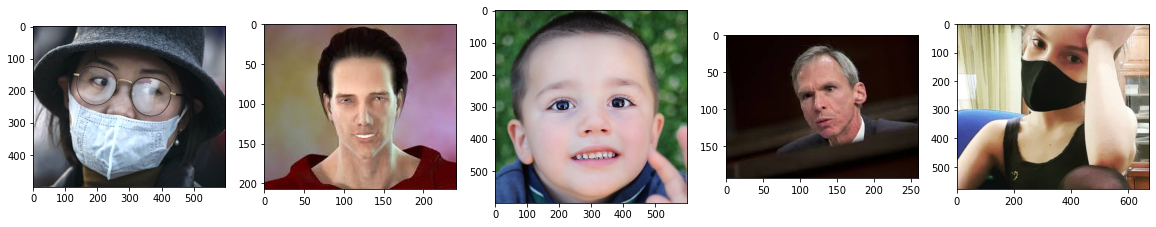

In [ ]:
path='/content/drive/My Drive/PART1_ai_project_20210824_0830/01_Images/All'# 모든 이미지가 담겨있는 폴더
import cv2 
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(20,20)) # 잘 불러오는지 확인하기 위해 임의의 5장 사진 출력
for i in range(5):
    file=random.choice(os.listdir(path)) # 디렉토리에 있는 파일 리스트를 가져온다.
    img_path=os.path.join(path,file)
    image=mpimg.imread(img_path)
    ax=plt.subplot(1,5,i+1)
    plt.imshow(image)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img #imagedatagenerator 임포트

# train_data, test_data 전처리
train_data=ImageDataGenerator(rescale=1.0/255, 
                              zoom_range=0.2, # 20% 확대
                              shear_range=0.2, # 이것은 회전에서 보이지 않는 일종의 '늘이기'를 이미지에 만듭니다
                               rotation_range=40,  # 40도 회전
                              width_shift_range=0.2, # 0.2만큼 옆으로 shift
                              height_shift_range=0.2, # 0.1만큼 위로 shift
                              horizontal_flip=True)


# 이미지를 불러올 때 폴더명에 맞춰 자동으로 labelling 해준다.('WithMask' : 0 ,'WithoutMask' : 1) 이미지 사이즈는 256* 256, 배치 사이즈는 32
train_generator = train_data.flow_from_directory(directory=traindir,target_size=(331, 331),class_mode='binary',batch_size=32)
test_data=ImageDataGenerator(rescale=1.0/255) 
# valid generator 도 train generator와 마찬가지로 진행
valid_generator = test_data.flow_from_directory(directory=validdir,target_size=(331, 331),class_mode='binary',batch_size=32)
# test 데이터도 train generator 에서 진행한 방식과 동일하고 추가적으로 rescaling을 진행
test_generator = test_data.flow_from_directory(directory=testdir,target_size=(331, 331),class_mode='binary',batch_size=32,shuffle=False)

print(valid_generator.class_indices)

Found 600 images belonging to 2 classes.
Found 306 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
{'WithMask': 0, 'WithoutMask': 1}


In [ ]:
from tensorflow.keras import layers, Sequential
import tensorflow as tf
NasNet = tf.keras.applications.NASNetLarge(weights='imagenet',include_top=False,input_shape=(331,331,3))

for layer in NasNet.layers:
    layer.trainable = False
    
vmodel = Sequential()
vmodel.add(NasNet)
vmodel.add(layers.Flatten())
vmodel.add(layers.Dense(1,activation='sigmoid'))
vmodel.summary()

vmodel.compile(optimizer='adam',loss='binary_crossentropy', metrics='accuracy')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
NASNet (Functional)          (None, 11, 11, 4032)      84916818  
_________________________________________________________________
flatten (Flatten)            (None, 487872)            0         
_________________________________________________________________
dense (Dense)                (None, 1)                 487873    
Total params: 85,404,691
Trainable params: 487,873
Non-trainable params: 84,916,818
_________________________________________________________________


In [ ]:
history = vmodel.fit(train_generator,steps_per_epoch=len(train_generator)//8,epochs=20,validation_data=valid_generator, batch_size=128)

Epoch 1/20
2/2 [==============================] - 328s 274s/step - loss: 0.4765 - accuracy: 0.7500 - val_loss: 0.3202 - val_accuracy: 0.9739
Epoch 2/20
2/2 [==============================] - 275s 240s/step - loss: 0.1945 - accuracy: 0.9821 - val_loss: 0.7711 - val_accuracy: 0.9641
Epoch 3/20
2/2 [==============================] - 273s 243s/step - loss: 0.0438 - accuracy: 0.9688 - val_loss: 1.0955 - val_accuracy: 0.9608
Epoch 4/20
2/2 [==============================] - 276s 244s/step - loss: 0.9053 - accuracy: 0.9375 - val_loss: 1.0148 - val_accuracy: 0.9706
Epoch 5/20
2/2 [==============================] - 275s 244s/step - loss: 1.8257 - accuracy: 0.9375 - val_loss: 0.7377 - val_accuracy: 0.9706
Epoch 6/20
2/2 [==============================] - 274s 245s/step - loss: 0.1695 - accuracy: 0.9688 - val_loss: 0.3864 - val_accuracy: 0.9804
Epoch 7/20
2/2 [==============================] - 272s 244s/step - loss: 1.1179 - accuracy: 0.9688 - val_loss: 0.2586 - val_accuracy: 0.9804
Epoch 8/20
2/

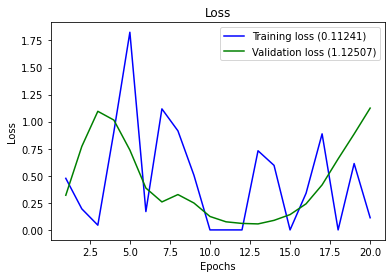

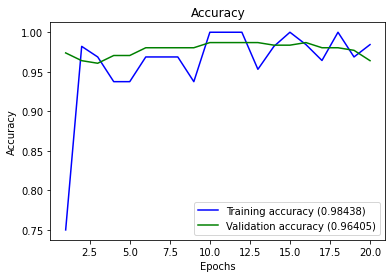

In [ ]:
def plot_history(history):  # 그림그리기
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]  #loss 랑 val값들이랑 분류작업 밑에도 똑같은 작용일듯
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:  # loss값이 없다면
        print('Loss is missing in history') # 잘못됬다는걸 보여주는거겠죠?
        return 
    
    epochs = range(1,len(history.history[loss_list[0]]) + 1) # epoch 횟수..
    
    ## Loss
    plt.figure(1) #도화지
    for l in loss_list: #순서대로 표기
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
plot_history(history)